In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier as rfc
from imblearn.over_sampling import SMOTE

%matplotlib inline 

In [2]:
australian_data_url = 'https://raw.githubusercontent.com/ibrahus/datasets/master/australian_credit_approval.csv'

In [3]:
data = pd.read_csv(australian_data_url)

The dataset is labelled on which columns are continuous (N), categorical (C) and if they require further encoding (C_enc).

In [4]:
data.head()

,C1,N2,N3,C4_enc,C5_enc,C6_enc,N7,C8,C9,N10,C11,C12_enc,N13,N14,Target
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   C1       690 non-null    int64  
 1   N2       690 non-null    float64
 2   N3       690 non-null    float64
 3   C4_enc   690 non-null    int64  
 4   C5_enc   690 non-null    int64  
 5   C6_enc   690 non-null    int64  
 6   N7       690 non-null    float64
 7   C8       690 non-null    int64  
 8   C9       690 non-null    int64  
 9   N10      690 non-null    int64  
 10  C11      690 non-null    int64  
 11  C12_enc  690 non-null    int64  
 12  N13      690 non-null    int64  
 13  N14      690 non-null    int64  
 14  Target   690 non-null    int64  
dtypes: float64(3), int64(12)
memory usage: 81.0 KB


In [6]:
data['Target'].value_counts(normalize=False)

0    383
1    307
Name: Target, dtype: int64

In [7]:
#One hot encoding of categorical variables
data = pd.get_dummies(data=data,columns=[
                                       'C4_enc','C5_enc', 'C6_enc',
                                       'C12_enc'])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   C1         690 non-null    int64  
 1   N2         690 non-null    float64
 2   N3         690 non-null    float64
 3   N7         690 non-null    float64
 4   C8         690 non-null    int64  
 5   C9         690 non-null    int64  
 6   N10        690 non-null    int64  
 7   C11        690 non-null    int64  
 8   N13        690 non-null    int64  
 9   N14        690 non-null    int64  
 10  Target     690 non-null    int64  
 11  C4_enc_1   690 non-null    uint8  
 12  C4_enc_2   690 non-null    uint8  
 13  C4_enc_3   690 non-null    uint8  
 14  C5_enc_1   690 non-null    uint8  
 15  C5_enc_2   690 non-null    uint8  
 16  C5_enc_3   690 non-null    uint8  
 17  C5_enc_4   690 non-null    uint8  
 18  C5_enc_5   690 non-null    uint8  
 19  C5_enc_6   690 non-null    uint8  
 20  C5_enc_7  

In [9]:
#Train and test split
y = data['Target']
X = data.drop('Target', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

####Model training and evaluation

In [10]:
def model_assess(model, name='Default'):
  model.fit(X_train, y_train)
  preds = model.predict(X_test)
  # preds_proba = model.predict_proba(x_test)
  print('                   ', name, '\n',
  classification_report(y_test, preds))

parameter tuning with KNN model and GridSearchCV

In [11]:
# k_range = list(range(1,31))
# weight_options = ["uniform", "distance"]

# param_grid = dict(n_neighbors = k_range, weights = weight_options)
# #print (param_grid)
# knn = KNeighborsClassifier()

# grid = GridSearchCV(knn, param_grid, cv = 5, scoring = 'roc_auc',
#                     verbose=True, n_jobs=-1)
# grid.fit(X,y)

# print (grid.best_score_)
# print (grid.best_params_)
# print (grid.best_estimator_)



```
0.7483851267994996
{'n_neighbors': 26, 'weights': 'distance'}
KNeighborsClassifier(n_neighbors=26, weights='distance')
```



In [12]:
#KNN
knn = KNeighborsClassifier(n_neighbors=26, weights='distance')
model_assess(knn, name='KNN')

                    KNN 
               precision    recall  f1-score   support

           0       0.72      0.80      0.76       118
           1       0.68      0.58      0.63        89

    accuracy                           0.71       207
   macro avg       0.70      0.69      0.69       207
weighted avg       0.70      0.71      0.70       207



parameter tuning with SVM model and GridSearchCV

In [13]:
# tuned_parameters = [
#     {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [1, 10, 100, 1000]},
#     {"kernel": ["linear"], "C": [1, 10, 100, 1000]},
# ]
# clf = GridSearchCV(SVC(), tuned_parameters, scoring='roc_auc', 
#                    verbose=True, n_jobs=-1)
# clf.fit(X_train, y_train)

# print(clf.best_score_)
# print(clf.best_params_)
# print(clf.best_estimator_)



```
0.9265336629930647
{'C': 1, 'kernel': 'linear'}
SVC(C=1, kernel='linear'
```



In [14]:
#Support Vector Machines
svm = SVC(C=100, gamma=0.0001, kernel='rbf', probability=True)
model_assess(svm, 'SVM')

                    SVM 
               precision    recall  f1-score   support

           0       0.77      0.79      0.78       118
           1       0.71      0.69      0.70        89

    accuracy                           0.74       207
   macro avg       0.74      0.74      0.74       207
weighted avg       0.74      0.74      0.74       207



parameter tuning with LogisticRegression model and GridSearchCV

In [15]:
# # parameter grid
# parameters = {
#     'penalty' : ['l1','l2'], 
#     'C'       : np.logspace(-3,3,7),
#     'solver'  : ['newton-cg', 'lbfgs', 'liblinear']}

# param_grid = [    
#     {'penalty' : ['l1', 'l2'],
#     'C' : np.logspace(-3,3,7),
#     'solver' : ['lbfgs','newton-cg','liblinear'],
#     }
# ]

# logreg=LogisticRegression()
# logreg_cv=GridSearchCV(logreg, param_grid=param_grid, scoring='roc_auc', cv=5,
#                        verbose=True, n_jobs=-1)
# logreg_cv.fit(X, y)

# print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
# print("accuracy :",logreg_cv.best_score_)



```
(best parameters)  {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.9269801860306746
```



In [16]:
#Logistic Regression
lg = LogisticRegression(C=1, penalty='l2', solver='lbfgs')
model_assess(lg, 'Logistic Regression')

                    Logistic Regression 
               precision    recall  f1-score   support

           0       0.88      0.89      0.88       118
           1       0.85      0.83      0.84        89

    accuracy                           0.86       207
   macro avg       0.86      0.86      0.86       207
weighted avg       0.86      0.86      0.86       207



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


parameter tuning with XGBoost model and GridSearchCV

In [17]:
# # Grid search cross validation

# parameters = {
#     'max_depth': range(2, 10, 1),
#     'n_estimators': range(60, 220, 40),
#     'learning_rate': [0.1, 0.01, 0.05]
# }

# xgb_estimator = XGBClassifier()

# xgb_grid_search = GridSearchCV(
#     estimator=xgb_estimator,
#     param_grid=parameters,
#     scoring = 'roc_auc',
#     n_jobs = -1,
#     cv = 5,
#     verbose=True
# )

# xgb_grid_search.fit(X, y)

# print(xgb_grid_search.best_params_)
# print(xgb_grid_search.best_score_)



```
{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 140}
0.9337931130769087
```



In [18]:
#XGB
xgb = XGBClassifier(n_estimators=140, learning_rate=0.05, max_depth=2)
model_assess(xgb, 'XGBoost')

                    XGBoost 
               precision    recall  f1-score   support

           0       0.85      0.88      0.87       118
           1       0.84      0.80      0.82        89

    accuracy                           0.85       207
   macro avg       0.84      0.84      0.84       207
weighted avg       0.85      0.85      0.84       207



In [19]:
# Random Forest
rfc_model = rfc(random_state=11)
model_assess(rfc_model, 'Random Forest')

                    Random Forest 
               precision    recall  f1-score   support

           0       0.86      0.89      0.88       118
           1       0.85      0.81      0.83        89

    accuracy                           0.86       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.85      0.86      0.85       207



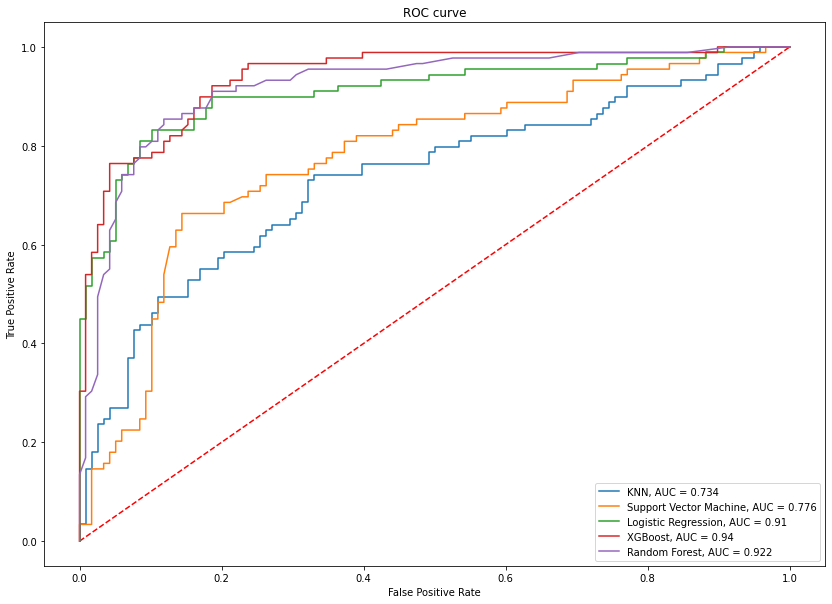

In [20]:
#ROC AUC
fig = plt.figure(figsize=(14,10))
plt.plot([0, 1], [0, 1],'r--')

#KNN
preds_proba_knn = knn.predict_proba(X_test)
probsknn = preds_proba_knn[:, 1]
fpr, tpr, thresh = roc_curve(y_test, probsknn)
aucknn = roc_auc_score(y_test, probsknn)
plt.plot(fpr, tpr, label=f'KNN, AUC = {str(round(aucknn,3))}')

#Support Vector Machines
preds_proba_svm = svm.predict_proba(X_test)
probs_svm = preds_proba_svm[:, 1]
fpr, tpr, thresh = roc_curve(y_test, probs_svm)
auc_svm = roc_auc_score(y_test, probs_svm)
plt.plot(fpr, tpr, label=f'Support Vector Machine, AUC = {str(round(auc_svm,3))}')

#Logistic Regression
preds_proba_lg = lg.predict_proba(X_test)
probslg = preds_proba_lg[:, 1]
fpr, tpr, thresh = roc_curve(y_test, probslg)
auclg = roc_auc_score(y_test, probslg)
plt.plot(fpr, tpr, label=f'Logistic Regression, AUC = {str(round(auclg,3))}')

#XGBoost
preds_proba_xgb = xgb.predict_proba(X_test)
probsxgb = preds_proba_xgb[:, 1]
fpr, tpr, thresh = roc_curve(y_test, probsxgb)
aucxgb = roc_auc_score(y_test, probsxgb)
plt.plot(fpr, tpr, label=f'XGBoost, AUC = {str(round(aucxgb,3))}')

#Random Forest
preds_proba_rfc = rfc_model.predict_proba(X_test)
probs_rfc = preds_proba_rfc[:, 1]
fpr, tpr, thresh = roc_curve(y_test, probs_rfc)
auc_rfc = roc_auc_score(y_test, probs_rfc)
plt.plot(fpr, tpr, label=f'Random Forest, AUC = {str(round(auc_rfc,3))}')

plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC curve")
plt.rcParams['axes.titlesize'] = 18
plt.legend()
plt.show()

####SMOTE

Credit Number X_train dataset:  (483, 38)
Credit Number y_train dataset:  (483,)
Credit Number X_test dataset:  (207, 38)
Credit Number y_test dataset:  (207,)

Before OverSampling, counts of label '1': 218
Before OverSampling, counts of label '0': 265 

After OverSampling, the shape of train_x: (530, 38)
After OverSampling, the shape of train_y: (530,) 

After OverSampling, counts of label '1', %: 50.0
After OverSampling, counts of label '0', %: 50.0 



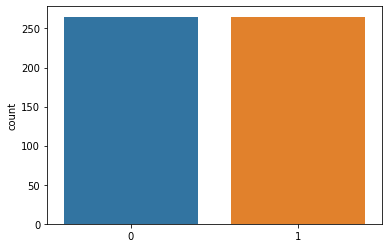

In [21]:
print("Credit Number X_train dataset: ", X_train.shape)
print("Credit Number y_train dataset: ", y_train.shape)
print("Credit Number X_test dataset: ", X_test.shape)
print("Credit Number y_test dataset: ", y_test.shape)

print("\nBefore OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=11)
X_train_s, y_train_s = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_x: {}'.format(X_train_s.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_s.shape))

print("After OverSampling, counts of label '1', %: {}".format(sum(y_train_s==1)/len(y_train_s)*100.0,2))
print("After OverSampling, counts of label '0', %: {} \n".format(sum(y_train_s==0)/len(y_train_s)*100.0,2))

sns.countplot(x=y_train_s, data=data)

In [22]:
def smote_model_assess(model, name='Default'):
  model.fit(X_train_s, y_train_s)
  preds = model.predict(X_test)
  print('                   ', name, '\n',
  classification_report(y_test, preds))

In [23]:
#KNN
knn_s = KNeighborsClassifier(n_neighbors=26, weights='distance')
smote_model_assess(knn_s, name='KNN')

                    KNN 
               precision    recall  f1-score   support

           0       0.72      0.73      0.72       118
           1       0.63      0.62      0.62        89

    accuracy                           0.68       207
   macro avg       0.67      0.67      0.67       207
weighted avg       0.68      0.68      0.68       207



In [24]:
#Support Vector Machines
svm_s = SVC(C=100, gamma=0.0001, kernel='rbf', probability=True)
smote_model_assess(svm_s, 'SVM')

                    SVM 
               precision    recall  f1-score   support

           0       0.77      0.76      0.77       118
           1       0.69      0.70      0.69        89

    accuracy                           0.73       207
   macro avg       0.73      0.73      0.73       207
weighted avg       0.73      0.73      0.73       207



In [25]:
#XGB
xgb_s = XGBClassifier()
smote_model_assess(xgb_s, 'XGBoost')

                    XGBoost 
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       118
           1       0.82      0.81      0.81        89

    accuracy                           0.84       207
   macro avg       0.84      0.84      0.84       207
weighted avg       0.84      0.84      0.84       207



In [26]:
#Logistic Regression
lg_s = LogisticRegression(C=1, penalty='l2', solver='lbfgs')
smote_model_assess(lg_s, 'Logistic Regression')

                    Logistic Regression 
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       118
           1       0.84      0.85      0.84        89

    accuracy                           0.86       207
   macro avg       0.86      0.86      0.86       207
weighted avg       0.87      0.86      0.86       207



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [27]:
# Random Forest
rfc_model_s = rfc(random_state=11)
smote_model_assess(rfc_model_s, 'Random Forest')

                    Random Forest 
               precision    recall  f1-score   support

           0       0.87      0.90      0.88       118
           1       0.86      0.82      0.84        89

    accuracy                           0.86       207
   macro avg       0.86      0.86      0.86       207
weighted avg       0.86      0.86      0.86       207



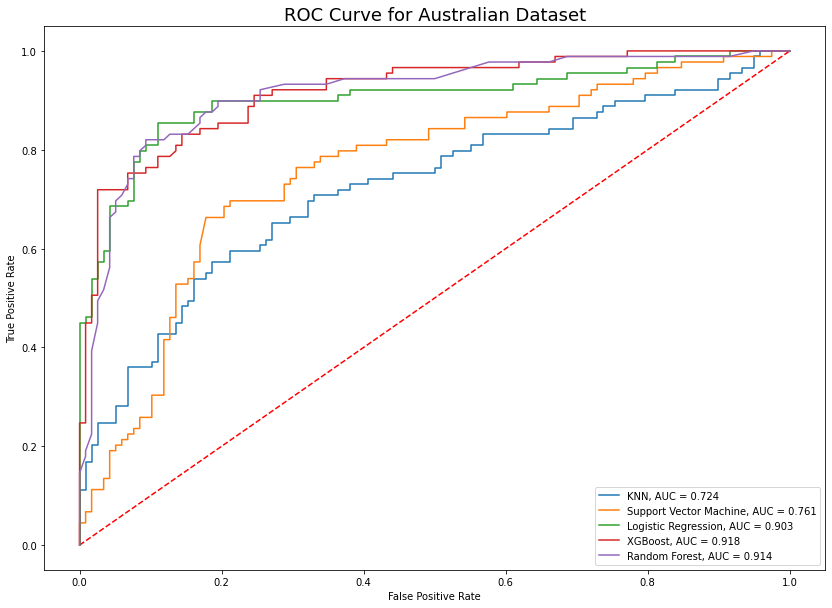

In [28]:
#ROC AUC
fig = plt.figure(figsize=(14,10))
plt.plot([0, 1], [0, 1],'r--')

#KNN
preds_proba_knn = knn_s.predict_proba(X_test)
probsknn = preds_proba_knn[:, 1]
fpr, tpr, thresh = roc_curve(y_test, probsknn)
aucknn = roc_auc_score(y_test, probsknn)
plt.plot(fpr, tpr, label=f'KNN, AUC = {str(round(aucknn,3))}')

#Support Vector Machines
preds_proba_svm = svm_s.predict_proba(X_test)
probs_svm = preds_proba_svm[:, 1]
fpr, tpr, thresh = roc_curve(y_test, probs_svm)
auc_svm = roc_auc_score(y_test, probs_svm)
plt.plot(fpr, tpr, label=f'Support Vector Machine, AUC = {str(round(auc_svm,3))}')

#Logistic Regression
preds_proba_lg = lg_s.predict_proba(X_test)
probslg = preds_proba_lg[:, 1]
fpr, tpr, thresh = roc_curve(y_test, probslg)
auclg = roc_auc_score(y_test, probslg)
plt.plot(fpr, tpr, label=f'Logistic Regression, AUC = {str(round(auclg,3))}')

#XGBoost
preds_proba_xgb = xgb_s.predict_proba(X_test)
probsxgb = preds_proba_xgb[:, 1]
fpr, tpr, thresh = roc_curve(y_test, probsxgb)
aucxgb = roc_auc_score(y_test, probsxgb)
plt.plot(fpr, tpr, label=f'XGBoost, AUC = {str(round(aucxgb,3))}')

#Random Forest
preds_proba_rfc = rfc_model_s.predict_proba(X_test)
probs_rfc = preds_proba_rfc[:, 1]
fpr, tpr, thresh = roc_curve(y_test, probs_rfc)
auc_rfc = roc_auc_score(y_test, probs_rfc)
plt.plot(fpr, tpr, label=f'Random Forest, AUC = {str(round(auc_rfc,3))}')

plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve for Australian Dataset")
plt.rcParams['axes.titlesize'] = 18
plt.legend()
plt.show()

####Acceptance rates XGBoost

Acceptance rate is a percentage of new loans that we accept with the goal of keeping the number of defaults in a portfolio below a certain number.

In [29]:
#XGBoost
xgb_preds = xgb.predict(X_test)
xgb_prob = xgb.predict_proba(X_test)[:, 1]

xgb_df = pd.DataFrame({'true_loan_status': y_test,
                       'prob_default': xgb_prob, 'pred_loan_status': xgb_preds})
xgb_df.sample()

,true_loan_status,prob_default,pred_loan_status
453,1,0.413296,0


Credit strategy and minimum expected loss

In [30]:
# set all acceptance rates to test
accept_rates = [1.0, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55,
    0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]
# create lists to store threshols and bad rates and number of accepted loand
thresholds = []
bad_rates = []
num_accepted_loans = []

# new dataframe from xgb_df
test_pred_df = xgb_df.copy()

In [31]:
def strategy_table(accept_rates):
  for rate in accept_rates:
    # calculate threshold
    threshold = np.quantile(test_pred_df['prob_default'], rate).round(3)
    # store threshold value in list
    thresholds.append(threshold)
    # apply thresholds to reassign loan status
    test_pred_df['pred_loan_status'] = test_pred_df['prob_default'].apply(
        lambda x: 1 if x > threshold else 0)
    # create accepted loans set of predicted non-default
    accepted_loans = test_pred_df[test_pred_df['pred_loan_status'] == 0]
    # claculate and store bad rate
    bad_rates.append(np.sum((accepted_loans['true_loan_status'])
              / accepted_loans['true_loan_status'].count()).round(3))
    # add the number of accepted loans for each acceptance rate
    num_accepted_loans.append(len(test_pred_df[test_pred_df['prob_default'] <
                                          np.quantile(test_pred_df['prob_default'],
                                                      rate)]))

In [32]:
strategy_table(accept_rates)

# create strategy dataframe
strategy_xgb_df = pd.DataFrame(zip(accept_rates, thresholds, bad_rates,
                               num_accepted_loans),
                           columns=['Acceptance Rate', 'Threshold',
                                    'Bad Rate', 'Num Accepted Loans'])
strategy_xgb_df.head()

,Acceptance Rate,Threshold,Bad Rate,Num Accepted Loans
0,1.00,0.980,0.427,206
1,0.95,0.961,0.404,196
2,0.90,0.950,0.362,186
3,0.85,0.928,0.335,176
4,0.80,0.874,0.291,165


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


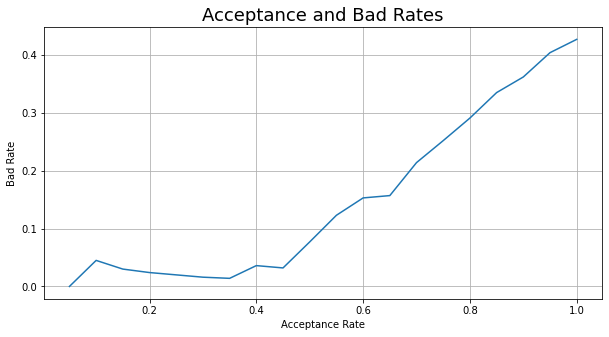

In [33]:
# Plot the strategy curve
fig = plt.figure(figsize=(10,5))

plt.plot(strategy_xgb_df['Acceptance Rate'], strategy_xgb_df['Bad Rate'])
plt.xlabel('Acceptance Rate')
plt.ylabel('Bad Rate')
plt.title('Acceptance and Bad Rates')
plt.axes().yaxis.grid()
plt.axes().xaxis.grid()
plt.show()

Num Accepted Loans: The number of accepted loans based on the threshold

Avg Loan Amnt: The average loan amount of the entire test set

Estimated value: The estimated net value of non-defaults minus defaults

In [34]:
# adding average loan amount from test data set
strategy_xgb_df['Avg Loan Amount'] = np.mean(X_test['N2'])*100

# adding average value of accepted loan non-default minue average
# value of accepted defaults
strategy_xgb_df['Estimated Value'] = ((strategy_xgb_df['Num Accepted Loans'] *
                                   (1 - strategy_xgb_df['Bad Rate'])) *
                                  strategy_xgb_df['Avg Loan Amount']) - (strategy_xgb_df['Num Accepted Loans'] *
                                   strategy_xgb_df['Bad Rate'] *
                                   strategy_xgb_df['Avg Loan Amount'])
                                  
strategy_xgb_df.head()

,Acceptance Rate,Threshold,Bad Rate,Num Accepted Loans,Avg Loan Amount,Estimated Value
0,1.00,0.980,0.427,206,3125.879227,94013.943633
1,0.95,0.961,0.404,196,3125.879227,117633.087072
2,0.90,0.950,0.362,186,3125.879227,160470.136000
3,0.85,0.928,0.335,176,3125.879227,181551.065507
4,0.80,0.874,0.291,165,3125.879227,215591.890290


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


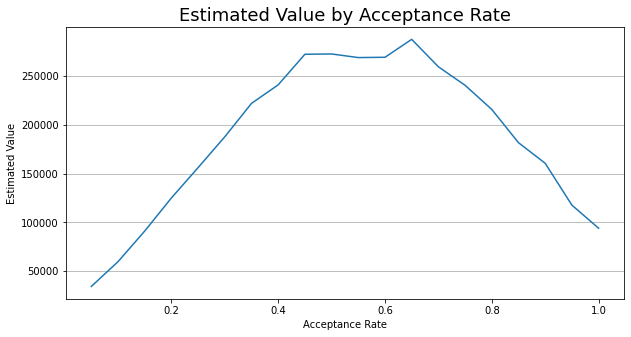

In [35]:
# Create a line plot of estimated value
fig = plt.figure(figsize=(10,5))
plt.plot(strategy_xgb_df['Acceptance Rate'],strategy_xgb_df['Estimated Value'])
plt.title('Estimated Value by Acceptance Rate')
plt.xlabel('Acceptance Rate')
plt.ylabel('Estimated Value')
plt.axes().yaxis.grid()
plt.show()

In [36]:
# Print the row with the max estimated value
print(strategy_xgb_df.loc[strategy_xgb_df['Estimated Value'] == np.max(strategy_xgb_df['Estimated Value'])])

   Acceptance Rate  Threshold  Bad Rate  Num Accepted Loans  Avg Loan Amount  \
7             0.65       0.68     0.157                 134      3125.879227   

   Estimated Value  
7    287343.322068  


Based on the maximum estimated value, acceptance rate of 0.65 and threshold of 0.68 is the best.

In [37]:
preds_df = pd.DataFrame({'prob_default': xgb_prob})
xgb_preds_loan_status = preds_df['prob_default'].apply(
    lambda x: 1 if x > 0.68 else 0)

print('                   ', 'XGBoost', '\n',
classification_report(y_test, xgb_preds_loan_status))

                    XGBoost 
               precision    recall  f1-score   support

           0       0.84      0.96      0.90       118
           1       0.93      0.76      0.84        89

    accuracy                           0.87       207
   macro avg       0.89      0.86      0.87       207
weighted avg       0.88      0.87      0.87       207



Text(0.5, 15.0, 'Predicted Label')

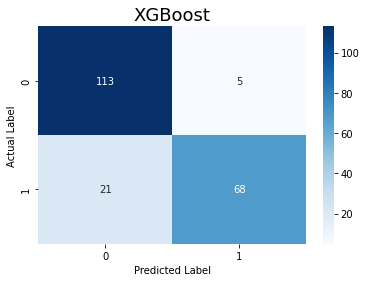

In [38]:
cnf_matrix = confusion_matrix(y_test, xgb_preds_loan_status)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='Blues', fmt='g')
plt.title('XGBoost')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

####Acceptance rates Logistic Regression

Acceptance rate is a percentage of new loans that we accept with the goal of keeping the number of defaults in a portfolio below a certain number.

In [39]:
#Logistic Regression
lg_preds = lg.predict(X_test)
lg_prob = lg.predict_proba(X_test)[:, 1]

lg_df = pd.DataFrame({'true_loan_status': y_test,
                       'prob_default': lg_prob, 'pred_loan_status': lg_preds})
lg_df.sample()

,true_loan_status,prob_default,pred_loan_status
327,0,0.026039,0


Credit strategy and minimum expected loss

In [40]:
# set all acceptance rates to test
accept_rates = [1.0, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55,
    0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]
# create lists to store threshols and bad rates and number of accepted loand
thresholds = []
bad_rates = []
num_accepted_loans = []

In [41]:
def strategy_table(accept_rates):
  for rate in accept_rates:
    # calculate threshold
    threshold = np.quantile(lg_df['prob_default'], rate).round(3)
    # store threshold value in list
    thresholds.append(threshold)
    # apply thresholds to reassign loan status
    lg_df['pred_loan_status'] = lg_df['prob_default'].apply(
        lambda x: 1 if x > threshold else 0)
    # create accepted loans set of predicted non-default
    accepted_loans = lg_df[lg_df['pred_loan_status'] == 0]
    # claculate and store bad rate
    bad_rates.append(np.sum((accepted_loans['true_loan_status'])
              / accepted_loans['true_loan_status'].count()).round(3))
    # add the number of accepted loans for each acceptance rate
    num_accepted_loans.append(len(lg_df[lg_df['prob_default'] <
                                          np.quantile(lg_df['prob_default'],
                                                      rate)]))

In [42]:
strategy_table(accept_rates)

# create strategy dataframe
strategy_lg_df = pd.DataFrame(zip(accept_rates, thresholds, bad_rates,
                               num_accepted_loans),
                           columns=['Acceptance Rate', 'Threshold',
                                    'Bad Rate', 'Num Accepted Loans'])
strategy_lg_df.head()

,Acceptance Rate,Threshold,Bad Rate,Num Accepted Loans
0,1.00,1.000,0.430,206
1,0.95,0.985,0.398,196
2,0.90,0.946,0.366,186
3,0.85,0.914,0.330,176
4,0.80,0.889,0.295,165


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


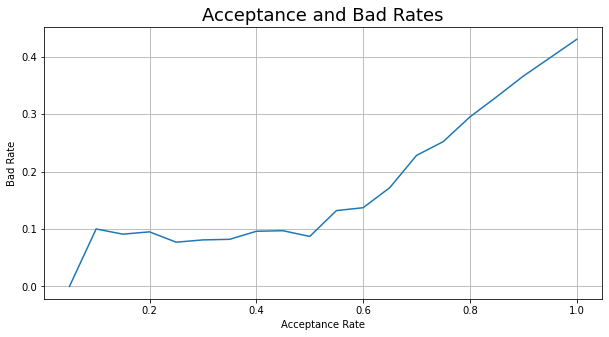

In [43]:
# Plot the strategy curve
fig = plt.figure(figsize=(10,5))

plt.plot(strategy_lg_df['Acceptance Rate'], strategy_lg_df['Bad Rate'])
plt.xlabel('Acceptance Rate')
plt.ylabel('Bad Rate')
plt.title('Acceptance and Bad Rates')
plt.axes().yaxis.grid()
plt.axes().xaxis.grid()
plt.show()

Num Accepted Loans: The number of accepted loans based on the threshold

Avg Loan Amnt: The average loan amount of the entire test set

Estimated value: The estimated net value of non-defaults minus defaults

In [44]:
# adding average loan amount from test data set
strategy_lg_df['Avg Loan Amount'] = np.mean(X_test['N2'])*100

# adding average value of accepted loan non-default minue average
# value of accepted defaults
strategy_lg_df['Estimated Value'] = ((strategy_lg_df['Num Accepted Loans'] *
                                   (1 - strategy_lg_df['Bad Rate'])) *
                                  strategy_lg_df['Avg Loan Amount']) - (strategy_lg_df['Num Accepted Loans'] *
                                   strategy_lg_df['Bad Rate'] *
                                   strategy_lg_df['Avg Loan Amount'])
                                  
strategy_lg_df.head()

,Acceptance Rate,Threshold,Bad Rate,Num Accepted Loans,Avg Loan Amount,Estimated Value
0,1.00,1.000,0.430,206,3125.879227,90150.356908
1,0.95,0.985,0.398,196,3125.879227,124985.155014
2,0.90,0.946,0.366,186,3125.879227,155818.827710
3,0.85,0.914,0.330,176,3125.879227,187052.612947
4,0.80,0.889,0.295,165,3125.879227,211465.729710


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


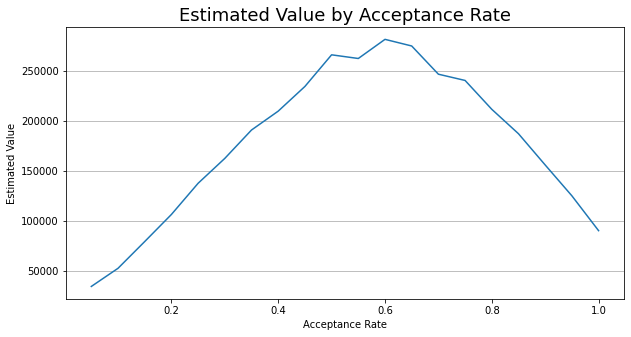

In [45]:
# Create a line plot of estimated value
fig = plt.figure(figsize=(10,5))
plt.plot(strategy_lg_df['Acceptance Rate'],strategy_lg_df['Estimated Value'])
plt.title('Estimated Value by Acceptance Rate')
plt.xlabel('Acceptance Rate')
plt.ylabel('Estimated Value')
plt.axes().yaxis.grid()
plt.show()

In [46]:
# Print the row with the max estimated value
print(strategy_lg_df.loc[strategy_lg_df['Estimated Value'] == np.max(strategy_lg_df['Estimated Value'])])

   Acceptance Rate  Threshold  Bad Rate  Num Accepted Loans  Avg Loan Amount  \
8              0.6      0.529     0.137                 124      3125.879227   

   Estimated Value  
8    281404.151536  


Based on the maximum estimated value, acceptance rate of 0.6 and threshold of 0.529 is the best.

In [47]:
preds_df = pd.DataFrame({'prob_default': lg_prob})
lg_preds_loan_status = preds_df['prob_default'].apply(
    lambda x: 1 if x > 0.529 else 0)

print('                   ', 'Logistic Regression', '\n',
classification_report(y_test, lg_preds_loan_status))

                    Logistic Regression 
               precision    recall  f1-score   support

           0       0.86      0.91      0.88       118
           1       0.87      0.81      0.84        89

    accuracy                           0.86       207
   macro avg       0.87      0.86      0.86       207
weighted avg       0.86      0.86      0.86       207



Text(0.5, 15.0, 'Predicted Label')

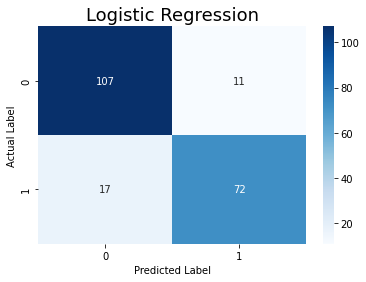

In [48]:
cnf_matrix = confusion_matrix(y_test, lg_preds_loan_status)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='Blues', fmt='g')
plt.title('Logistic Regression')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

####Acceptance rates Random Forest

Acceptance rate is a percentage of new loans that we accept with the goal of keeping the number of defaults in a portfolio below a certain number.

In [49]:
#Random Forest
rfc_preds = rfc_model.predict(X_test)
rfc_prob = rfc_model.predict_proba(X_test)[:, 1]

rfc_df = pd.DataFrame({'true_loan_status': y_test,
                       'prob_default': rfc_prob, 'pred_loan_status': rfc_preds})
rfc_df.sample()

,true_loan_status,prob_default,pred_loan_status
362,0,0.15,0


Credit strategy and minimum expected loss

In [50]:
# set all acceptance rates to test
accept_rates = [1.0, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55,
    0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]
# create lists to store threshols and bad rates and number of accepted loand
thresholds = []
bad_rates = []
num_accepted_loans = []

In [51]:
def strategy_table(accept_rates):
  for rate in accept_rates:
    # calculate threshold
    threshold = np.quantile(rfc_df['prob_default'], rate).round(3)
    # store threshold value in list
    thresholds.append(threshold)
    # apply thresholds to reassign loan status
    rfc_df['pred_loan_status'] = rfc_df['prob_default'].apply(
        lambda x: 1 if x > threshold else 0)
    # create accepted loans set of predicted non-default
    accepted_loans = rfc_df[rfc_df['pred_loan_status'] == 0]
    # claculate and store bad rate
    bad_rates.append(np.sum((accepted_loans['true_loan_status'])
              / accepted_loans['true_loan_status'].count()).round(3))
    # add the number of accepted loans for each acceptance rate
    num_accepted_loans.append(len(rfc_df[rfc_df['prob_default'] <
                                          np.quantile(rfc_df['prob_default'],
                                                      rate)]))

In [52]:
strategy_table(accept_rates)

# create strategy dataframe
strategy_rf_df = pd.DataFrame(zip(accept_rates, thresholds, bad_rates,
                               num_accepted_loans),
                           columns=['Acceptance Rate', 'Threshold',
                                    'Bad Rate', 'Num Accepted Loans'])
strategy_rf_df.head()

,Acceptance Rate,Threshold,Bad Rate,Num Accepted Loans
0,1.00,1.000,0.430,203
1,0.95,0.960,0.401,195
2,0.90,0.924,0.371,186
3,0.85,0.900,0.348,174
4,0.80,0.848,0.303,165


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


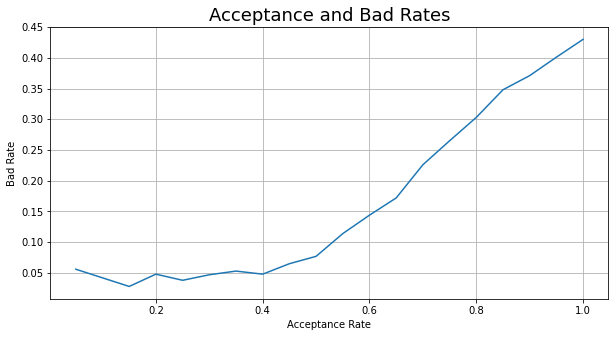

In [53]:
# Plot the strategy curve
fig = plt.figure(figsize=(10,5))

plt.plot(strategy_rf_df['Acceptance Rate'], strategy_rf_df['Bad Rate'])
plt.xlabel('Acceptance Rate')
plt.ylabel('Bad Rate')
plt.title('Acceptance and Bad Rates')
plt.axes().yaxis.grid()
plt.axes().xaxis.grid()
plt.show()

Num Accepted Loans: The number of accepted loans based on the threshold

Avg Loan Amnt: The average loan amount of the entire test set

Estimated value: The estimated net value of non-defaults minus defaults

In [54]:
# adding average loan amount from test data set
strategy_rf_df['Avg Loan Amount'] = np.mean(X_test['N2'])*100

# adding average value of accepted loan non-default minue average
# value of accepted defaults
strategy_rf_df['Estimated Value'] = ((strategy_rf_df['Num Accepted Loans'] *
                                   (1 - strategy_rf_df['Bad Rate'])) *
                                  strategy_rf_df['Avg Loan Amount']) - (strategy_rf_df['Num Accepted Loans'] *
                                   strategy_rf_df['Bad Rate'] *
                                   strategy_rf_df['Avg Loan Amount'])
                                  
strategy_rf_df.head()

,Acceptance Rate,Threshold,Bad Rate,Num Accepted Loans,Avg Loan Amount,Estimated Value
0,1.00,1.000,0.430,203,3125.879227,88837.487633
1,0.95,0.960,0.401,195,3125.879227,120690.196957
2,0.90,0.924,0.371,186,3125.879227,150004.692348
3,0.85,0.900,0.348,174,3125.879227,165346.507594
4,0.80,0.848,0.303,165,3125.879227,203213.408551


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


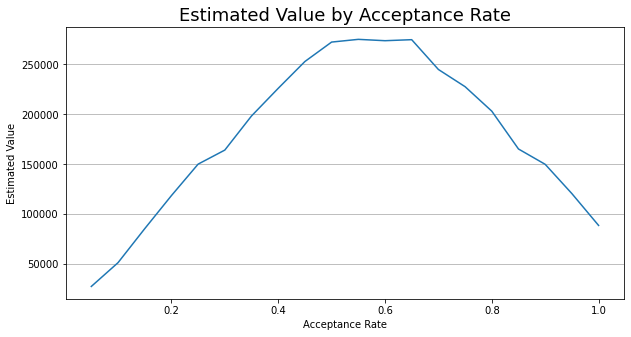

In [55]:
# Create a line plot of estimated value
fig = plt.figure(figsize=(10,5))
plt.plot(strategy_rf_df['Acceptance Rate'],strategy_rf_df['Estimated Value'])
plt.title('Estimated Value by Acceptance Rate')
plt.xlabel('Acceptance Rate')
plt.ylabel('Estimated Value')
plt.axes().yaxis.grid()
plt.show()

In [56]:
# Print the row with the max estimated value
print(strategy_rf_df.loc[strategy_rf_df['Estimated Value'] == np.max(strategy_rf_df['Estimated Value'])])

   Acceptance Rate  Threshold  Bad Rate  Num Accepted Loans  Avg Loan Amount  \
9             0.55      0.423     0.114                 114      3125.879227   

   Estimated Value  
9    275102.379014  


Based on the maximum estimated value, acceptance rate of 0.55 and threshold of 0.423 is the best.

In [57]:
preds_df = pd.DataFrame({'prob_default': rfc_prob})
rfc_preds_loan_status = preds_df['prob_default'].apply(
    lambda x: 1 if x > 0.423 else 0)

print('                   ', 'Random Forest', '\n',
classification_report(y_test, rfc_preds_loan_status))

                    Random Forest 
               precision    recall  f1-score   support

           0       0.89      0.86      0.87       118
           1       0.82      0.85      0.84        89

    accuracy                           0.86       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.86      0.86      0.86       207



Text(0.5, 15.0, 'Predicted Label')

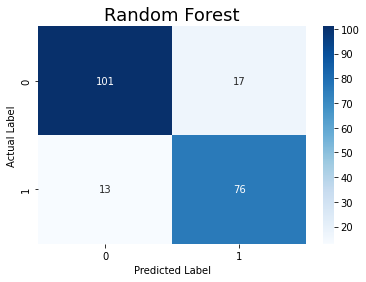

In [58]:
cnf_matrix = confusion_matrix(y_test, rfc_preds_loan_status)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='Blues', fmt='g')
plt.title('Random Forest')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

####Plot Aceeptance Rate

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


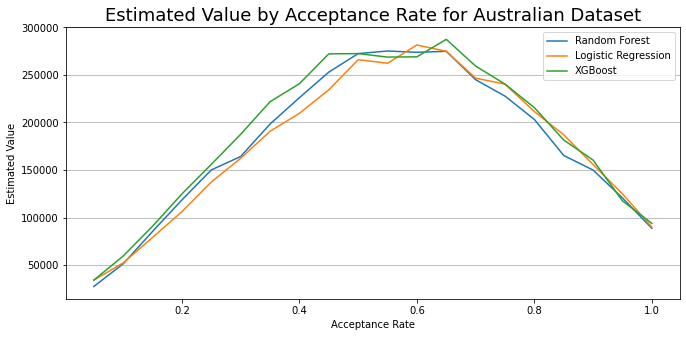

In [59]:
# Create a line plot of estimated value
fig = plt.figure(figsize=(11,5))
plt.plot(strategy_rf_df['Acceptance Rate'],strategy_rf_df['Estimated Value'], label='Random Forest')
plt.plot(strategy_lg_df['Acceptance Rate'],strategy_lg_df['Estimated Value'], label='Logistic Regression')
plt.plot(strategy_xgb_df['Acceptance Rate'],strategy_xgb_df['Estimated Value'], label='XGBoost')
plt.title('Estimated Value by Acceptance Rate for Australian Dataset')
plt.xlabel('Acceptance Rate')
plt.ylabel('Estimated Value')
plt.legend()
plt.axes().yaxis.grid()
plt.show()